In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/Telor/Desktop/spotify-2023.csv", encoding="cp1251")
print(data.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

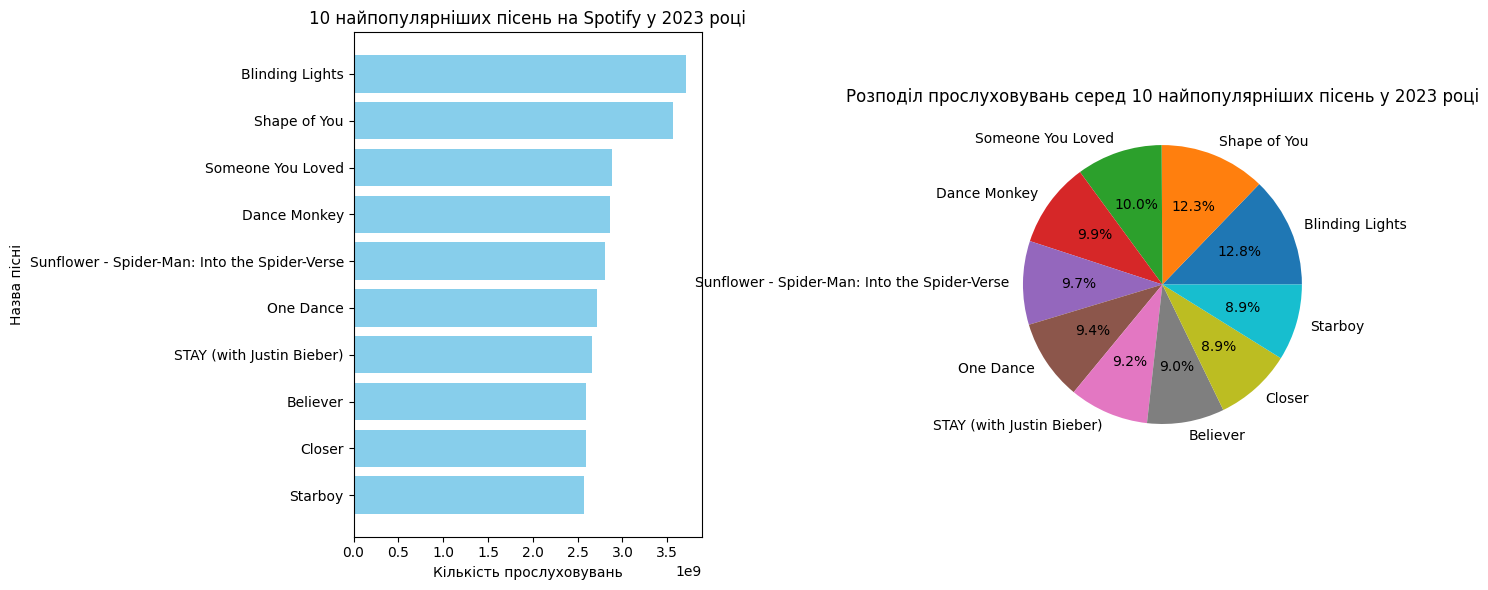

In [8]:
#графіки 10 найбільш популярних пісень
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
top_songs = data.nlargest(10, 'streams')

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
plt.barh(top_songs['track_name'], top_songs['streams'], color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва пісні')
plt.title('10 найпопулярніших пісень на Spotify у 2023 році')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.pie(top_songs['streams'], labels=top_songs['track_name'], autopct='%1.1f%%')
plt.title('Розподіл прослуховувань серед 10 найпопулярніших пісень у 2023 році')
plt.tight_layout()
plt.show()

(-1.0999997453987178,
 1.099999965791423,
 -1.099999775737823,
 1.0999999202207114)

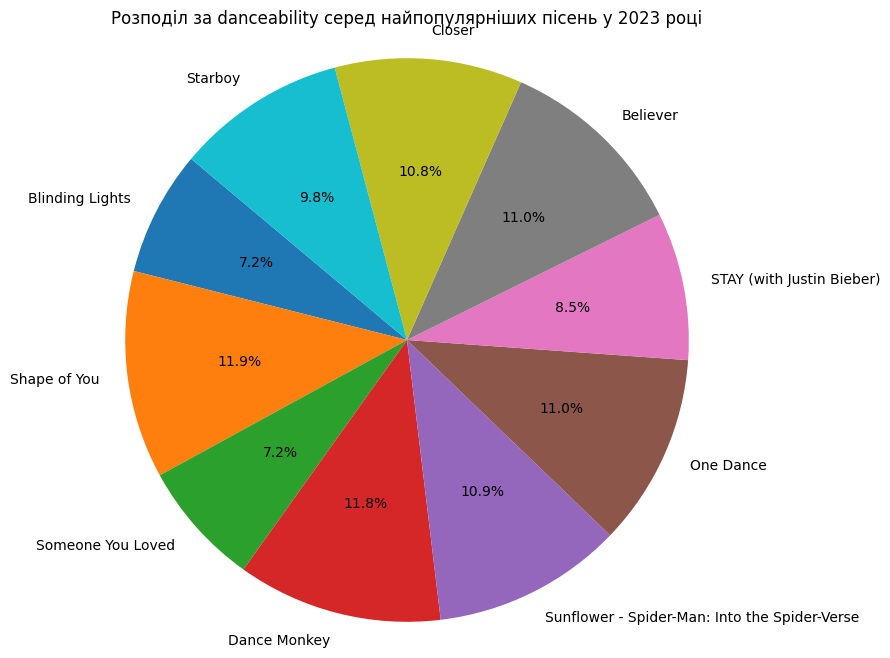

In [9]:
# розподіл за danceability серед найпопулярніших пісень у 2023 році.
plt.figure(figsize=(8, 8))
plt.pie(top_songs['danceability_%'], labels=top_songs['track_name'], autopct='%1.1f%%', startangle=140)
plt.title('Розподіл за danceability серед найпопулярніших пісень у 2023 році')
plt.axis('equal')

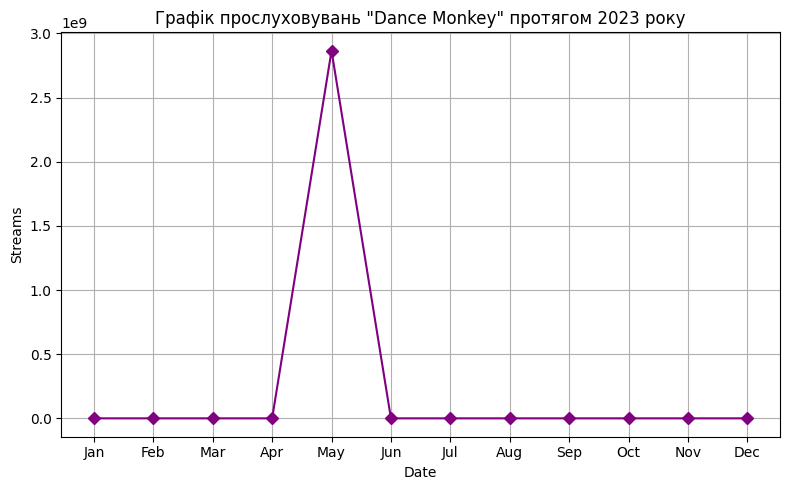

In [11]:
#Графік моніторингу певного треку протягом 2023
specific_track = data[data['track_name'] == 'Dance Monkey']
monthly_streams = specific_track.groupby(['released_month'])['streams'].sum()
months = list(range(1, 13))
monthly_streams = monthly_streams.reindex(months, fill_value=0)
plt.figure(figsize=(8, 5))
plt.plot(monthly_streams.index, monthly_streams.values, marker='D', linestyle='-', color="purple")
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Графік прослуховувань "Dance Monkey" протягом 2023 року')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.grid(True)
plt.show()

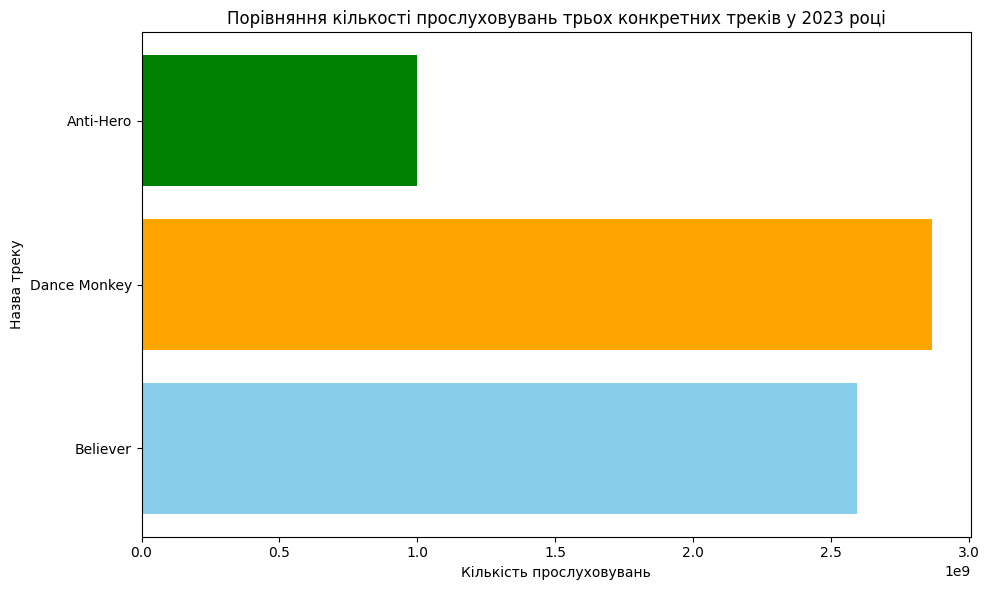

In [27]:
# Порівяння трьох конкретних треків
track1 = "Believer"
track2 = "Dance Monkey"
track3 = "Anti-Hero"

# Фільтруємо дані за вибраними треками
track1_data = data[data['track_name'] == track1]
track2_data = data[data['track_name'] == track2]
track3_data = data[data['track_name'] == track3]

track1_streams = track1_data['streams'].sum()
track2_streams = track2_data['streams'].sum()
track3_streams = track3_data['streams'].sum()

plt.figure(figsize=(10, 6))
plt.barh([track1, track2, track3], [track1_streams, track2_streams, track3_streams], color=['skyblue', 'orange', 'green'])
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва треку')
plt.title('Порівняння кількості прослуховувань трьох конкретних треків у 2023 році')
plt.tight_layout()
plt.show()
